In [12]:
import cv2
import pandas
import kornia
import numpy as np
import matplotlib.pyplot as plt 
import torch

# Gaussian Noise

In [49]:
import cv2
import numpy as np

# Load the image
img1 = cv2.imread('C:/Users/HP/ImageData/test_image.jpg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Generate random Gaussian noise
mean = 0
stddev = 0.05
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)

# Add noise to image
noisy_img = cv2.add(img, noise)
print(noisy_img.shape)




(433, 640, 3)


In [56]:


# Apply the Variance-Stabilizing Transform (VST)
img1 = cv2.imread('C:/Users/HP/Noise/noise4.png')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
vst_image = np.sqrt(np.maximum(img, 0.0))

# Compute the local MAD of the VST image using a rolling window
def compute_local_mad(image, window_size):
    padded_image = np.pad(image, ((window_size//2, window_size//2), (window_size//2, window_size//2), (0, 0)), mode='constant')
    med_abs_dev = np.median(np.abs(image - np.median(padded_image, axis=(0, 1))))
    return med_abs_dev

# Determine an appropriate window size based on the image shape
image_height, image_width, _ = img.shape
# You can adjust the scale factor (e.g., 0.01) based on your image dimensions and characteristics
window_size = int(min(image_height, image_width) * 0.01)

# Ensure that the window size is odd
if window_size % 2 == 0:
    window_size += 1

local_mad = compute_local_mad(vst_image, window_size)

# Estimate the noise standard deviation (sigma) from the local MAD
sigma_estimate = local_mad / 0.6745  # 0.6745 is a constant for Gaussian distribution

# Print the estimated sigma
print("Estimated Noise Standard Deviation (Sigma):", sigma_estimate)


Estimated Noise Standard Deviation (Sigma): 3.3151489659003555


(-0.5, 31.5, 31.5, -0.5)

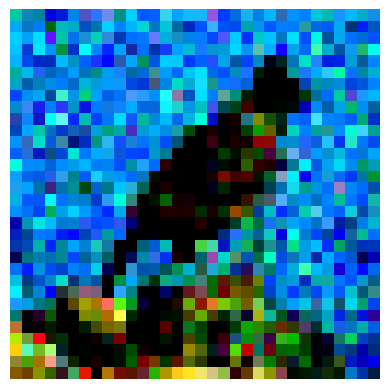

In [54]:
plt.imshow(img)
plt.axis("off")

In [48]:
img.shape

(433, 640, 3)

(-0.5, 639.5, 432.5, -0.5)

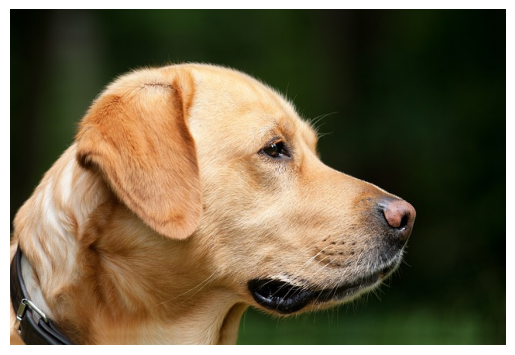

In [55]:
plt.imshow(noisy_img)
plt.axis("off")

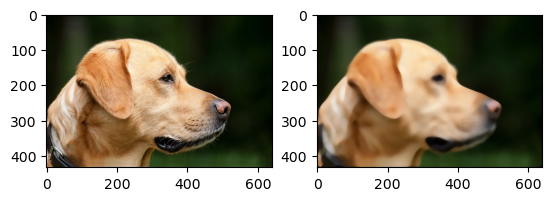

In [14]:

#image to tensor
tensor_image=kornia.utils.image_to_tensor(noisy_img, keepdim=False).float()

output = kornia.filters.median_blur(tensor_image,(15, 15))
#tensor to image
img_blur = kornia.tensor_to_image(output.byte())

#subplotting
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(noisy_img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_blur)

# Salt & Pepper Noise

(-0.5, 639.5, 432.5, -0.5)

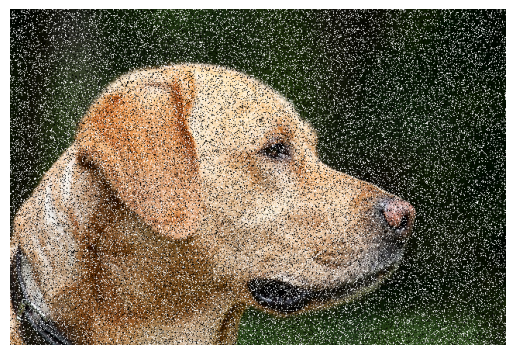

In [16]:
import cv2
import numpy as np
import random
# Load the image
img1 = cv2.imread('test_image.jpg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Generate salt & pepper noise

p=0.25 #noise density
rows, columns, channels = img.shape
noisy_img = np.zeros(img.shape, np.uint8)
for i in range(rows):
    for j in range(columns):
        noise = random.random()
        if noise < p/2:
            noisy_img[i][j]=[0,0,0]
        elif noise < p:
            noisy_img[i][j]=[255,255,255]
        else:
            noisy_img[i][j]=img[i][j]

plt.imshow(noisy_img)
plt.axis("off")